<h1><font color="#113D68" size=6>Python intermedio</font></h1>

<h1><font color="#113D68" size=5>Proyecto final</font></h1>

<h1><font color="#113D68" size=4>Planificador de desplazamientos</font></h1>


<a id="section1"></a>
# <font color="#004D7F" size=4>Carga del dataset del mapa</font>

In [31]:

import json
import urllib.request
import requests
import urllib
from geopy.geocoders import Nominatim
import pandas as pd
#geoloc=Nominatim(user_agent="GeotLoc")
#locname=str(geoloc.reverse("-3.986595434424537, -79.19934528718197"))

#de la ubicacion las coordenadas
ubicacion='Eplicachima,Loja, 110150, Ecuador'
api_url_geocoding='http://www.mapquestapi.com/geocoding/v1/address?'
key='xrX87rGpHC3Rw2GzcM9rbNuYmcWPRdOB'
url_geocoding=api_url_geocoding+urllib.parse.urlencode({'key':key, 'location':'Ecuador, Loja, Eplicachima, Calicuchima'})
data_geocoding= urllib.request.urlopen(url_geocoding).read().decode()
ubicacion_json_geocoding=json.loads(data_geocoding) #guardo json
ubicacion_list=ubicacion_json_geocoding['results'][0]['locations'][0]['latLng']# saco coordenadas
ubicacion_coordenadas1=ubicacion_list.values()#saco coordenada
ubicacion_coordenadas=list(ubicacion_coordenadas1) #saco coordenada en list
ub_lng=str(ubicacion_coordenadas[0])#saco  str
ub_lat=str(ubicacion_coordenadas[1])#saco lat str
ubi=ub_lng,ub_lat #tupla
ubi=','.join(ubi)# formato correcto para llamar a la api

#saco ruta
destino='Regina, Praga, Loja, 110107, Ecuador'
api_url='http://www.mapquestapi.com/directions/v2/route?'
key='xrX87rGpHC3Rw2GzcM9rbNuYmcWPRdOB'
url=api_url+urllib.parse.urlencode({'key':key, 'from':ubi, 'to':destino})
data = urllib.request.urlopen(url).read().decode()
obj_json=json.loads(data)
print(url) #url del api del json

http://www.mapquestapi.com/directions/v2/route?key=xrX87rGpHC3Rw2GzcM9rbNuYmcWPRdOB&from=-3.99537%2C-79.211&to=Regina%2C+Praga%2C+Loja%2C+110107%2C+Ecuador


<a id="section2"></a>
# <font color="#004D7F" size=4> Trazo el mapa en archivo html</font>

In [53]:
#trazo aqui ya la info del api con el mapa de folium

import folium as fl

ruta=obj_json["route"]["legs"][0]['maneuvers'][0:]#extraigo info del json
df_ruta=pd.DataFrame(ruta) #dataframe con toda la info
startPoint_list=df_ruta['startPoint'].to_list()# coordenadas de la ruta en lista
startPoint_df=pd.DataFrame(startPoint_list) # coordenadas de la ruta en dataframe
df_ruta=pd.concat([df_ruta,startPoint_df],axis=1)

place_lat = startPoint_df['lat'].astype(float).tolist()
place_lng = startPoint_df['lng'].astype(float).tolist()

points=[] #puntos

for i in range(len(place_lat)):
    points.append([place_lat[i], place_lng[i]])

#mapa de folium
ubicacion_mapa = fl.Map(location=ubicacion_coordenadas, zoom_start=16)

#cargo los puntos el mapa destino y ubicacion
for i in range(0,len(df_ruta)):
    fl.Marker([df_ruta['lat'].iloc[i], df_ruta['lng'].iloc[i]],
                  popup=('calle {} \n '.format(df_ruta['streets'].iloc[i]))
                  ,icon = fl.Icon(color='blue',icon_color='white',prefix='fa', icon='taxi')
                  ).add_to(ubicacion_mapa)

#cargo la linea de ruta
fl.PolyLine(points, color='blue',dash_array='5',opacity ='.85',
                tooltip ='Transit Route 101'
                ).add_to(ubicacion_mapa)

m=ubicacion_mapa
ubicacion_mapa.save('ubicacion_mapa.html')

import io
from PIL import Image

img_data=m._to_png(1)
img=Image.open(io.BytesIO(img_data))
img.save('image.png')

# from pdfkit.api import configuration
# from html2image import Html2Image
# hti=Html2Image()
# hti.screenshot{
#    html_file='ubicacion_mapa.html',
#    save_as='blue_page.png'
# }


<a id="section3"></a>
# <font color="#004D7F" size=4> Carga del dataset de openweather</font>

In [71]:
##openweather
import json
import urllib.request
import requests
import urllib

import datetime as dt
from dateutil.relativedelta import relativedelta
import requests
import pandas as pd

url_openweather='http://api.openweathermap.org/data/2.5/forecast?'
api_key_openweather='b14a413b64315656a8433b324e350484'
city='Loja'
url_apiop= url_openweather+ 'appid=' + api_key_openweather +'&q=' + city
print(url_apiop)
response=requests.get(url_apiop).json()


http://api.openweathermap.org/data/2.5/forecast?appid=b14a413b64315656a8433b324e350484&q=Loja


<a id="section4"></a>
# <font color="#004D7F" size=4> Transformo el dataset en dataframe</font>

In [72]:
df_weather=pd.json_normalize(response['list'][0:])
df_weather=df_weather.drop(columns=['visibility','pop','main.feels_like','main.temp_min','main.temp_max','main.sea_level','main.grnd_level','main.temp_kf','clouds.all','wind.deg','wind.gust','rain.3h','sys.pod','dt'])
df_weather=df_weather.rename(columns={'dt_txt':'fecha','main.temp':'temp','main.pressure':'presion',
                                        'main.humidity':'humedad','wind.speed':'velocidad_aire'})
df_weather['fecha'] = df_weather['fecha'].astype('datetime64')

#df_weather=df_weather.set_index('fecha')


lista_weather=[]

for i in range(len(df_weather)):
    list=df_weather['weather'][i]
    lista_weather.extend(list)
lista_weather=pd.DataFrame(lista_weather)
lista_weather=lista_weather.drop(columns=['id'])
df_weather=df_weather.drop(columns=['weather'])
df_weather=pd.concat([lista_weather,df_weather],axis=1)
df_weather=df_weather.set_index('fecha')
df_weather.temp=df_weather.temp-273.15

import time
imprimir_fecha=time.ctime()
imprimir_fecha=imprimir_fecha.split()

today=dt.datetime.today()
uno_dia=(today+relativedelta(days=+1)).strftime('%Y-%m-%d')
text_uno_dia=(today+relativedelta(days=+1)).strftime('%A')

dos_dia=(today+relativedelta(days=+2)).strftime('%Y-%m-%d')
text_dos_dia=(today+relativedelta(days=+2)).strftime('%A')

tres_dia=(today+relativedelta(days=+3)).strftime('%Y-%m-%d')
text_tres_dia=(today+relativedelta(days=+3)).strftime('%A')

cuatro_dia=(today+relativedelta(days=+4)).strftime('%Y-%m-%d')
text_cuatro_dia=(today+relativedelta(days=+4)).strftime('%A')

xlim=df_weather.loc[cuatro_dia]
df_weather.dtypes

main               object
description        object
icon               object
temp              float64
presion             int64
humedad             int64
velocidad_aire    float64
dtype: object

<a id="section5"></a>
# <font color="#004D7F" size=4>Importo la fecha y hora actual</font>

In [19]:
import time
imprimir_fecha=time.ctime()
imprimir_fecha=imprimir_fecha.split()
imprimir_fecha[0],imprimir_fecha[3]

('Wed', '15:45:38')

<a id="section6"></a>
# <font color="#004D7F" size=4> Grafico el clima</font>

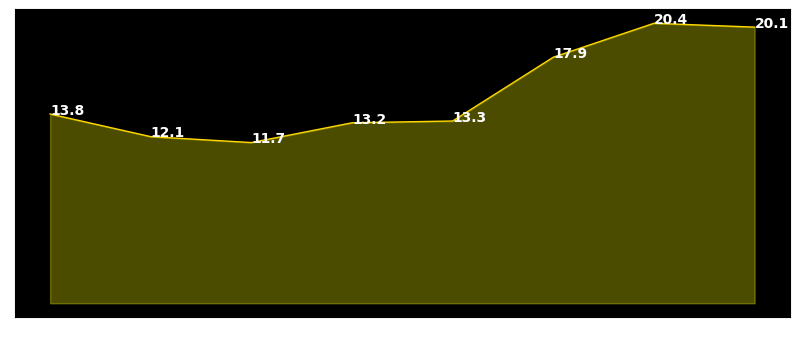

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#plt.style.use('dark_background')
fig=plt.figure(figsize=(10,4),frameon=False)
ax = fig.add_subplot()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.plot(xlim.temp,color='#ffd700',lw=1)
#plt.ylabel("Temperature (°C)")
#plt.xlabel("Hora del dia")
ax.fill_between(xlim.index,xlim.temp,alpha=0.30,color='yellow')
ax.get_yaxis().set_visible(False)
ax.set_facecolor('#000000')
ax.tick_params(axis='x',colors='white')
#fig.set_edgecolor('blue')
for i in range(1, len(xlim)+1):
    plt.annotate('%.1f'%xlim.temp[i-1],xy=(xlim.index[i-1],xlim.temp[i-1]),xytext=(0, 0),textcoords='offset points',color='white',fontweight='demibold')

